In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131832","key":"1ea3732629421f41f8d7e3ea75d7152e"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

 87% 73.0M/84.0M [00:00<00:00, 187MB/s]
100% 84.0M/84.0M [00:00<00:00, 174MB/s]


In [6]:
!unzip brain-tumor-detection.zip
!mkdir dataset/

Archive:  brain-tumor-detection.zip
  inflating: Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y712.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y713.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y714.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y715.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y716.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y717.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y718.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y719.jpg  
  inflating: Br35H-Mask-RCNN/TEST/y720.jpg  
  infl

In [7]:
!mv yes/ dataset/
!mv no/ dataset/

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [9]:
img_path = 'dataset/'

img_size =224

In [10]:
os.listdir(img_path)

['no', 'yes']

In [11]:
class_names=os.listdir(img_path)
def get_data(data_dir):
    img_data = [] 
    labels=[]
    for label in class_names: 
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [12]:
img_data,labels = get_data(img_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

the shape of input image data is (3000, 224, 224, 3), labels shape is (3000,)


[Text(0, 0, 'no'), Text(0, 0, 'yes')]

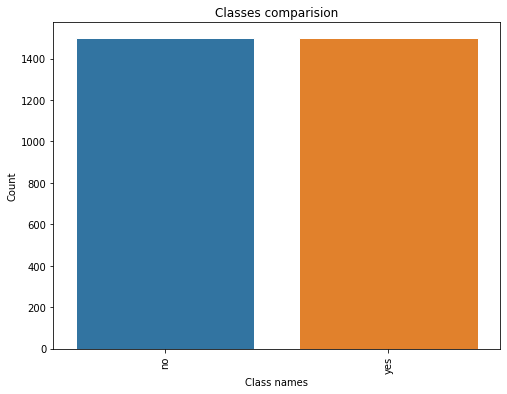

In [13]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
sns.set_style('dark')
sns.countplot(labels)
plt.title('Classes comparision')
plt.xlabel('Class names')
plt.ylabel('Count')
ax.set_xticklabels(class_names,rotation=90)

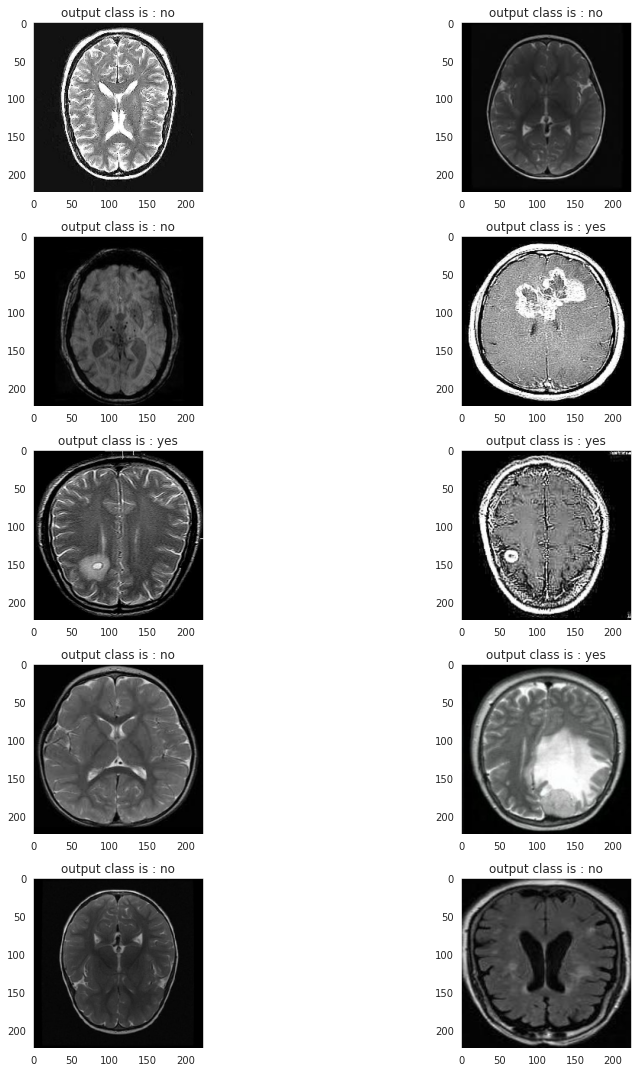

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('output class is : '+str(class_names[labels[l]]))
        
plt.tight_layout()

In [15]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       ...,

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]]

In [16]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0.], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (2400, 224, 224, 3), X_test shape is (600, 224, 224, 3)


In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model=Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(len(class_names),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 2)
callbacks_list=[learning_rate,cb_early_stop]

In [20]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=64,callbacks=[callbacks_list])

Epoch 1/7
38/38 [==============================] - 274s 7s/step - loss: 3.2494 - accuracy: 0.7596 - val_loss: 0.9962 - val_accuracy: 0.8633 - lr: 0.0010
Epoch 2/7
38/38 [==============================] - 267s 7s/step - loss: 0.3023 - accuracy: 0.9450 - val_loss: 0.7210 - val_accuracy: 0.8717 - lr: 0.0010
Epoch 3/7
38/38 [==============================] - 267s 7s/step - loss: 0.0927 - accuracy: 0.9750 - val_loss: 0.2025 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 4/7
38/38 [==============================] - 278s 7s/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.1728 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 5/7
38/38 [==============================] - 281s 7s/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.1581 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 6/7
38/38 [==============================] - 278s 7s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1578 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/7
38/38 [==============================] - 267s 7s/step - loss: 9.0019e-04

Text(0.5, 1.0, 'val accuracy')

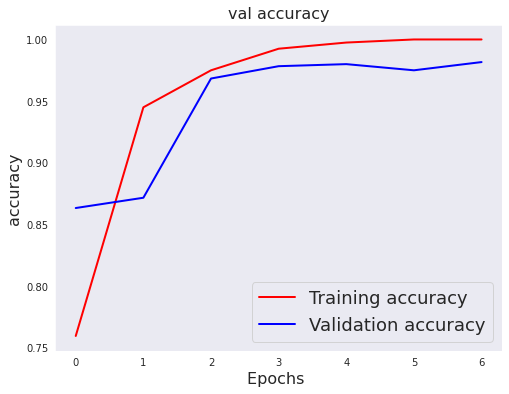

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [22]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

Accuracy : 98.16666666666667


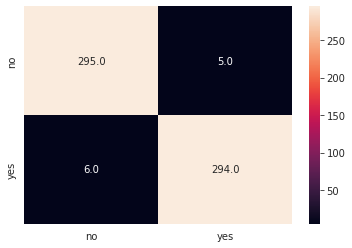

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

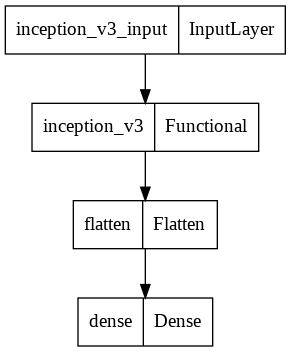

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [29]:
from google.colab import files
f=files.upload()

Saving y1010.jpg to y1010.jpg


(1, 224, 224, 3)

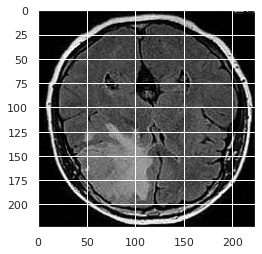

In [30]:
image_name='y1010.jpg'   # enter image name to test

x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

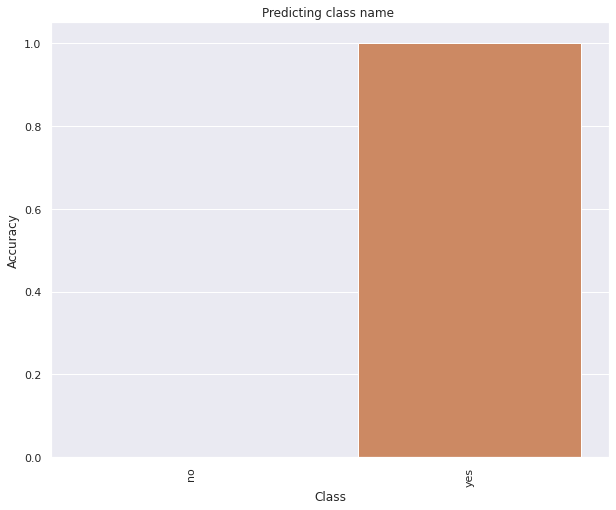

In [31]:
pred=model.predict(x1) # for predicting class
labels_pred=np.argmax(pred,axis=1)
labels=class_names[labels_pred[0]]
pred_results=pd.DataFrame(data=pred,columns=class_names)
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()